# Mini-curso de scikit-learn @ SciPy-SP

*Machine Learning em Python!*

por Danilo J. S. Bellini

# Parte 0 - Contexto

## Objetivo do curso

* Expor as convenções da biblioteca
* Ilustrar alguns conceitos básicos de Machine Learning
* Apresentar o vínculo com outras bibliotecas do Python
* Hands on!!!

# Instalação

Pelo gerenciador de pacotes de sua distribuição, `pip`, ou `conda`.
Maiores informações em http://scikit-learn.org/stable/install.html

Outros pacotes explicitamente utilizados neste mini-curso:

* NumPy
* SciPy
* Matplotlib
* Seaborn
* Pandas
* Jupyter

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Dicas gerais

* Se acabou o exercício, ajude o colega!
* Sempre olhe as docstrings (`Shift + TAB` no Jupyter, `?` ao final no IPython/Jupyter)
* Não use "copiar" e "colar", a menos que você já tenha decorado e esteja seguro sobre o conteúdo, senão isso pode atrapalhar o aprendizado

## O que é o scikit-learn?

Biblioteca FLOSS (BSD) para Statistical/Machine Learning (data mining, data analysis), contendo recursos para:

* **Aprendizado supervisionado**: classificação, regressão
* **Aprendizado não-supervisionado**: *clustering*, estimativa de densidade
* **Workflows estatísticos**: comparação, validação, escolha e combinação de parâmetros e modelos
* **Pré-processamento**: redução de dimensionalidade, normalização, cálculo de *features*

Além de bases de dados (datasets) e diversos outros recursos auxiliares.

![](ml_map.png)

Imagem obtida em: http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

Os "scikits" são bibliotecas para processamento científico que podem ser vistas como add-ons para o SciPy: https://www.scipy.org/scikits.html

Apesar do nome no PyPI seguir a convenção dos scikits, a importação do scikit-learn é realizada pelo nome `sklearn`, e o conteúdo da biblioteca está organizado na forma de subpacotes:

* `sklearn.base`
* `sklearn.calibration`
* `sklearn.cluster`
* `sklearn.covariance`
* `sklearn.cross_decomposition`
* `sklearn.datasets`
* `sklearn.decomposition`
* `sklearn.discriminant_analysis`
* `sklearn.dummy`
* `sklearn.ensemble`
* `sklearn.exceptions`
* `sklearn.feature_extraction`
* `sklearn.feature_selection`
* `sklearn.gaussian_process`
* `sklearn.isotonic`
* `sklearn.kernel_approximation`
* `sklearn.kernel_ridge`
* `sklearn.linear_model`
* `sklearn.manifold`
* `sklearn.metrics`
* `sklearn.mixture`
* `sklearn.model_selection`
* `sklearn.multiclass`
* `sklearn.multioutput`
* `sklearn.naive_bayes`
* `sklearn.neighbors`
* `sklearn.neural_network`
* `sklearn.pipeline`
* `sklearn.preprocessing`
* `sklearn.random_projection`
* `sklearn.semi_supervised`
* `sklearn.svm`
* `sklearn.tree`
* `sklearn.utils`

A Documentação da API possui informações sobre todos esses subpacotes: http://scikit-learn.org/stable/modules/classes.html

Obviamente não veremos tudo neste tutorial introdutório, mas tentaremos entender as interfaces para utilizar os estimadores e outros recursos presentes no scikit-learn!

# Parte 1 - Aprendizado supervisionado

Aprendizado supervisionado é aquele em que nós possuímos a informação do resultado/alvo para as entradas (variáveis independentes) fornecidas. Aprendemos a partir de pares `(vetor_de_features, alvo)`, em que o vetor de *features* de uma entrada está associado a um valor ou classe/rótulo `alvo` mensurado/fixado, que queremos ser capazes de predizer a partir de um novo vetor de *features*.

Podemos dividir o aprendizado supervisionado de acordo com a natureza da variável alvo:

* Classificação (variável dependente categórica): processo de identificação da classe-alvo a partir dos *features*
* Regressão (variável dependente quantitativa): cálculo de um número a partir das variáveis de entrada, estando presente alguma noção de métrica/distância/similaridade entre os possíveis alvos

Dependendo do contexto, há outros nomes possíveis para essa variáveis ([Dependent and independent variables na Wikipedia](https://en.wikipedia.org/wiki/Dependent_and_independent_variables)):

> [...], an independent variable is sometimes called a "predictor variable", "regressor", "controlled variable", "manipulated variable", "explanatory variable", "exposure variable" (see reliability theory), "risk factor" (see medical statistics), "feature" (in machine learning and pattern recognition) or "input variable"

> [...], a dependent variable is sometimes called a "response variable", "regressand", "predicted variable", "measured variable", "explained variable", "experimental variable", "responding variable", "outcome variable", "output variable" or "label".

## Datasets no scikit-learn

Os datasets que podem ser abertos diretamente com o scikit-learn são dicionários com pelo menos os seguintes valores associados às seguintes chaves:

* `DESCR`: Descrição, em texto, do conteúdo do dataset
* `data`: `np.ndarray` $2D$ com os *features* ou variáveis independentes (entrada), em que cada coluna é um *feature*
* `target`: `np.ndarray` $1D$ com os alvos ou variáveis dependentes (saída)

Quando aplicável, há ainda:

* `feature_names`: nomes dos *features* (colunas do `data`)
* `target_names`: rótulos/*labels* para cada valor possível de `target`
* `images`: `np.ndarray` com a imagem de entrada

## Iris

Vamos abrir um dataset famoso!

In [2]:
from sklearn import datasets

In [3]:
iris_dict = datasets.load_iris()
iris_dict.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [4]:
{k: type(v) for k, v in iris_dict.items()}

{'DESCR': str,
 'data': numpy.ndarray,
 'feature_names': list,
 'target': numpy.ndarray,
 'target_names': numpy.ndarray}

In [5]:
print(iris_dict["DESCR"])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [6]:
iris_dict["data"]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [7]:
iris_dict["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
iris_dict["target"]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
# Saída categórica com índices para esses nomes
iris_dict["target_names"]

array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10')

In [10]:
np.bincount(iris_dict["target"])

array([50, 50, 50])

In [11]:
iris = pd.DataFrame(iris_dict["data"], columns=iris_dict["feature_names"]) \
         .assign(species=[iris_dict["target_names"][idx] for idx in iris_dict["target"]])
iris.iloc[[0, 50, 100], :]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
100,6.3,3.3,6.0,2.5,virginica


Seriam esses dados linearmente separáveis?

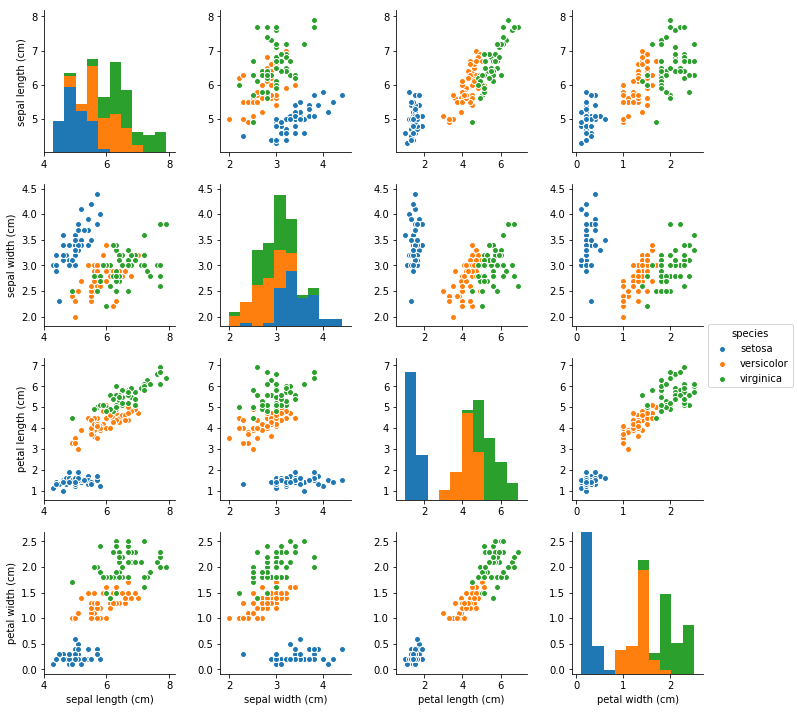

In [12]:
sns.pairplot(iris, hue="species");

Há uma classe/espécie que é! Você conseguiria colocar alguma reta acima em algum dos gráficos para separar uma distribuição das outras duas?

As outras duas espécies criam um bloco só, parecem mais difícil de separar.

Esse dataset, na versão atual, contém erros de transcrição, felizmente irrelevantes para este tutorial. Veja o artigo *The use of multiple measurements in taxonomic problems* (1933) do R. A. Fisher e a análise em https://github.com/danilobellini/scientific-literature para mais informações sobre o Iris, discriminantes lineares e o fundamento estatístico de parte do que será visto a seguir.

# Classificadores

No scikit-learn, há um padrão para todos os **estimadores**, objetos que são treinados para estimar/predizer valores. No caso da classificação, fazemos isso com os métodos `fit` e `predict`, um para treinar o classificador, o outro para utilizá-lo.

```python
from sklearn import módulo_com_classificador
estimator = módulo_com_classificador.ClasseDoClassificador(*args, **kwargs)
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
```

Cada entrada pode ser tanto um *array* do NumPy como um *dataframe* do Pandas:

* `X_train` e `X_test` são $2D$ e possuem um evento por linha, uma feature por coluna, como as matrizes do campo `data` dos datasets que vêm com o scikit-learn
* `y_train` é $1D$ e possui o resultado de cada respectivo evento, i.e., `y_train[i]` é o resultado do vetor de features `X_train[i]`

Obs.: Os nomes `X_train` e `X_test` não seguem a [PEP8](https://www.python.org/dev/peps/pep-0008/). Eles decorrem do uso tradicional de letras maiúsculas para representar matrizes e letras minúsculas para representar vetores, em matemática. A variável `X` é tradicionalmente utilizada para as matrizes de "entrada" e a `y` para o vetor (matriz coluna) de "saída". Porém, isso é apenas uma convenção de nomes, o contexto pode sugerir nomes mais descritivos.

Segue uma lista não-exaustiva dos classificadores disponíveis no scikit-learn:

* `sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis`
* `sklearn.ensemble.AdaBoostClassifier`
* `sklearn.ensemble.RandomForestClassifier`
* `sklearn.gaussian_process.GaussianProcessClassifier`
* `sklearn.linear_model.LogisticRegressionCV`
* `sklearn.linear_model.Perceptron` $\rightarrow$ possui `partial_fit`
* `sklearn.naive_bayes.GaussianNB` $\rightarrow$ possui `partial_fit`
* `sklearn.neighbors.KNeighborsClassifier`
* `sklearn.neural_network.MLPClassifier` $\rightarrow$ possui `partial_fit`
* `sklearn.svm.LinearSVC`
* `sklearn.svm.SVC`
* `sklearn.tree.DecisionTreeClassifier`

É possível identificar a espécie de Iris a partir das $4$ medidas (largura e comprimento das sépalas e pétalas)?

In [13]:
X = iris.iloc[:, :4]
y = iris["species"]

In [14]:
from sklearn import svm # SVM = Support Vector Machine
svm_estimator = svm.SVC() # Classificador utilizando a SVM, parâmetros default
svm_estimator.fit(X, y) # Treino!
svm_estimator.predict(X) # Parece com 50 setosa, 50 versicolor, 50 virginica?

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor', 'virginica',
    

Qual é a proporção de acertos?

In [15]:
svm_estimator.score(X, y) # Realiza o predict internamente

0.98666666666666669

## Overfitting

Quando temos um classificador, como podemos avaliá-lo?

Poderíamos usar os dados que temos para realizar essa avaliação, porém se esses dados são os mesmos utilizados para treinar o estimador, talvez estejamos propagando um vício sem saber, obtendo um resultado demasiado otimista devido à falta de variabilidade. O nome dado a esse resultado é **overfitting**.

Para auxiliar o entendimento do conceito, podemos fazer uma analogia disso com a aplicação de uma prova depois de uma aula. Durante a aula, o aluno pode encontrar um padrão como "*as respostas desse tipo de exercício formam uma P.A.*", por isso ter ocorrido nos exemplos mostrados, e achar que essa regra generalizava o que foi ensinado. Mas, se o padrão encontrado era meramente contingencial, esse aluno poderá se sair mal na prova por responder com os detalhes irrelevantes que memorizou ao invés de tentar aprender o conteúdo.

Por outro lado, em uma aula o professor explicita o que é esse conteúdo, enquanto que em generalizações realizadas a partir de dados, qualquer padrão, mesmo que não seja considerado o mais simples por algum critério, pode ser o conteúdo, e o que queremos testar é se o padrão encontrado faz sentido como generalização dos dados e dos eventos futuros. Uma forma de testar isso é reservando uma parte dos dados que temos para validar/testar a generalização realizada a partir dos demais dados.

## Dividindo o dataset em 2 partes

Uma prática comum em *machine learning* é a de dividir os dados fornecidos em $2$ conjuntos: um para a realização do treinamento (`fit`) do estimador, outro para a realização de uma avaliação do estimador obtido. Um conjunto para o "treino", outro para "testes". Entre os diversos modelos, adota-se o que minimiza o erro olhando apenas para o conjunto de testes:

![https://upload.wikimedia.org/wikipedia/commons/thumb/1/1f/Overfitting_svg.svg/800px-Overfitting_svg.svg.png](overfitting.png)

(Imagem obtida no Wikipedia)

In [16]:
from sklearn import model_selection

In [17]:
X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y,
                                     test_size=.25,
                                     random_state=11)

Isso separou $25\%$ dos dados para teste e $75\%$ para treino. Esse é o default, o argumento nominado `test_size` não precisava ter sido passado nesse caso, mas é útil explicitar esse número, e torna prático mudá-lo, caso necessário.

Poderíamos fazer esse particionamento manualmente, mas isso já particionou nossos dados embaralhando-os, sem perder a correspondência de índices entre as respectivas entradas e saídas.

In [18]:
# Chamar o `fit` novamente sobreescreve os dados, apagando o treino anterior!
# Classificadores que permitem aprendizado incremental possuem um método `partial_fit`!
svm_estimator.fit(X_train, y_train)
y_pred = svm_estimator.predict(X_test)

Como podemos avaliar se esse resultado `y_pred` é similar ao `y_test`?

## Confusion matrix

Podemos realizar avaliações sumarizando os erros e acertos de cada natureza em uma matriz:

In [19]:
from sklearn import metrics
metrics.confusion_matrix(y_pred, y_test)

array([[12,  0,  0],
       [ 0, 10,  0],
       [ 0,  1, 15]])

As colunas representam os resultados coletados, as linhas representam os resultados estimados.

O scikit-learn sempre ordena os dados ao apresentá-los, de maneira que as 3 linhas e as 3 colunas referem-se às espécies *setosa*, *versicolor* e *virginica* (ou 0, 1 e 2, se estivéssemos usando o `datasets.load_iris()["target"]`), nesta ordem. Para fixar uma ordem qualquer, usa-se o argumento nominado `labels`.

Colocando rótulos com o Pandas para melhorar a visualização:

In [20]:
labels = ["setosa", "versicolor", "virginica"]
pd.DataFrame(metrics.confusion_matrix(y_pred, y_test, labels=labels),
             index=[["y_pred"] * 3, labels],
             columns=[["y_test"] * 3, labels])

y_test                     
                  setosa versicolor virginica
y_pred setosa         12          0         0
       versicolor      0         10         0
       virginica       0          1        15

## Resumo

O que fizemos até o momento pode ser re-escrito da seguinte forma, sem utilizar o Pandas:

In [21]:
from sklearn import datasets, model_selection, svm, metrics

iris_dict = datasets.load_iris()

X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(iris_dict["data"], iris_dict["target"],
                                     test_size=.25, random_state=11)

# Extra: o "fit" devolve o próprio objeto estimador
svm_estimator = svm.SVC().fit(X_train, y_train)
y_pred = svm_estimator.predict(X_test)
metrics.confusion_matrix(y_pred, y_test) # Implicitamente labels=[0, 1, 2]

array([[12,  0,  0],
       [ 0, 10,  0],
       [ 0,  1, 15]])

In [22]:
svm_estimator.score(X_test, y_test)

0.97368421052631582

Sem fixar o `random_state`, o resultado talvez não seja o mesmo, pois chamar `train_test_split` re-embaralha os dados.

## Exercício

Utilizando as técnicas vistas, treinar um classificador para separar os seguintes blobs gerados aleatoriamente, avaliando o resultado obtido:

In [23]:
X_blob, y_blob = datasets.make_blobs(n_samples=2000, n_features=2, centers=4, random_state=32)

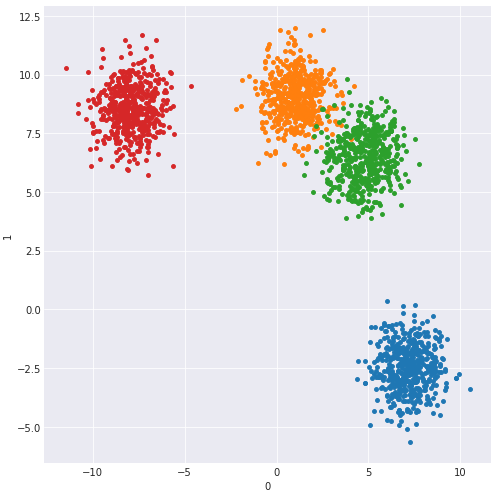

In [24]:
with sns.axes_style("darkgrid"):
    sns.FacetGrid(pd.DataFrame(X_blob).assign(y=y_blob), hue="y", aspect=1, size=7) \
       .map(plt.scatter, 0, 1, s=15)

# Parte 2 - Combinando blocos

Para o que foi feito até agora, é suficiente saber que esse classificador `sklearn.svm.SVC` encontra um discriminante linear para separar as classes (na realidade, maximizando a distância com relação às amostras). Porém, um discriminante linear consegue apenas separar duas classes (espécies, no caso do Iris dataset). Para funcionar com múltiplas classes, o `sklearn.svm.SVC` resolve isso agindo como um "one-on-one classifier". O que é isso? Tem alternativa?

## Multi-classes

Essas classes são *decorators* (no sentido do *design pattern*) para classificadores binários:

* `sklearn.multiclass.OneVsOneClassifier`: Classifica todos os pares de classes separadamente, selecionando o que tiver o maior número de votos
* `sklearn.multiclass.OneVsRestClassifier`: Cria um classificador para cada classe, avaliando se pertence à mesma ou ao conjunto de todas as demais classes

No caso do SVM, se quiséssemos usá-lo como *one-vs-rest*, teríamos de instanciar o estimador desta maneira:

In [25]:
from sklearn import multiclass
one_vs_rest_svm_estimator = multiclass.OneVsRestClassifier(svm.SVC()).fit(X_train, y_train)
one_vs_rest_svm_estimator.score(X_test, y_test)

0.97368421052631582

Temos acesso aos classificadores binários:

In [26]:
one_vs_rest_svm_estimator.estimators_

[SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False),
 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False),
 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False)]

O método `decision_function` do estimador (classificador) binário é usado como critério de desempate, ou a primeira coluna do `predict_proba`, que representa a probabilidade da classe "positiva".

In [27]:
# No caso do SVM, estas são as distâncias com relação ao
# hiperplano que separa as classes
one_vs_rest_svm_estimator.estimators_[0].decision_function(X_test)

array([-1.08682022, -1.05634223, -1.10251936, -1.08519268, -1.07746091,
        1.12731628, -1.02641459,  0.88280246,  1.07429199, -1.13845824,
       -1.05559696, -1.13767144, -1.145706  , -1.06072592, -1.08637874,
        0.68995994, -1.06941047, -1.15636043, -1.09294126, -1.07881393,
       -1.2028071 ,  1.17705002,  1.16119197, -1.07710714,  1.11284341,
        1.15779698, -1.09512484, -1.05642138,  1.13225135, -1.06559546,
        1.22628529, -1.08378228, -0.9210237 ,  1.20076559,  1.09976993,
       -0.84214889, -0.98509636, -1.09158957])

In [28]:
# Quando não é um classificador binário, cada coluna do
# `decision_function` refere-se a um classificador binário
one_vs_rest_svm_estimator.decision_function(X_test)

array([[-1.08682022, -1.38230433,  1.36704728],
       [-1.05634223, -1.26232967,  1.24560263],
       [-1.10251936, -0.03113809,  0.01828268],
       [-1.08519268,  0.55130853, -0.54585015],
       [-1.07746091, -1.02915058,  0.98692562],
       [ 1.12731628, -1.16801512, -1.13522258],
       [-1.02641459,  1.45271774, -1.45017397],
       [ 0.88280246, -1.09445797, -0.9585387 ],
       [ 1.07429199, -1.10398915, -1.13986584],
       [-1.13845824,  0.79352105, -0.77523383],
       [-1.05559696, -0.09982951, -0.00625661],
       [-1.13767144,  1.84262761, -1.84634409],
       [-1.145706  ,  0.39884106, -0.45857282],
       [-1.06072592, -1.04900701,  0.92046518],
       [-1.08637874, -1.17730058,  1.18636241],
       [ 0.68995994, -0.91501723, -0.9102663 ],
       [-1.06941047, -1.37898641,  1.281987  ],
       [-1.15636043,  0.57823055, -0.60390658],
       [-1.09294126, -0.73239296,  0.74490229],
       [-1.07881393, -0.99996996,  0.8967383 ],
       [-1.2028071 ,  1.66192887, -1.629

Para mais informações sobre classificadores multi-classe, veja http://scikit-learn.org/stable/modules/multiclass.html

## Pré-processamento

Dependendo do estimador, um ajuste aditivo/multiplicativo para normalização da entrada pode ser fundamental para treiná-lo, influenciando o comportamento do mesmo. O fluxo do pré-processamento é similar ao de classificação, dessa vez com os métodos `fit` e `transform`:

```python
from sklearn import preprocessing
pre_processor = preprocessing.ClasseDePréProcessamento(*args, **kwargs)
pre_processor.fit(X_train) # Encontra os parâmetros para pré-processar
X_data_p = pre_processor.transform(X_data) # Processa um conjunto de dados
```

Quando aplicado nos dados de treino, esse passo de transformação/pré-processamento passa a ser parte do pipeline de classificação, sendo necessário aplicá-lo nos dados antes do `predict` do classificador:

```python
X_train_p = pre_processor.transform(X_train)
X_test_p = pre_processor.transform(X_test)

estimator.fit(X_train_p, y_train) # Classificador do dado pré-processado!
y_pred = estimator.predict(X_test_p) # Predição também exige dado pré-processado!
```

## Normalização

Classes comuns para pré-processar colunas/*features* independentemente incluem:

* `StandardScaler`: subtrai a média e divide pelo desvio padrão
* `RobustScaler`: subtrai a mediana e divide pelo IQR
* `MinMaxScaler`: transformação afim do intervalo `[mínimo, máximo]` dos dados para o intervalo `[0, 1]`
* `MaxAbsScaler`: transformação afim do intervalo `[-m, m]` para o intervalo `[-1, 1]`, em que `m` é o máximo do valor absoluto do *feature*

Como exceção, a classe `sklearn.preprocessing.Normalizer` realiza um pré-processamento em cada linha, isoladamente, para esta ter norma unitária. Por não ter estado, o método `fit` de tal classe não faz nada, porém ele existe para que essa classe possa fazer parte de uma pipeline.

In [29]:
from sklearn import preprocessing
iris_scaler = preprocessing.MinMaxScaler()
iris_scaler.fit(X_train)
X_train_p = iris_scaler.transform(X_train)

In [30]:
iris_measurements = [cname.rsplit(None, 1)[0] for cname in iris_dict["feature_names"]]
iris_p = pd.DataFrame(X_train_p, columns=iris_measurements) \
           .assign(species=[iris_dict["target_names"][idx] for idx in y_train])

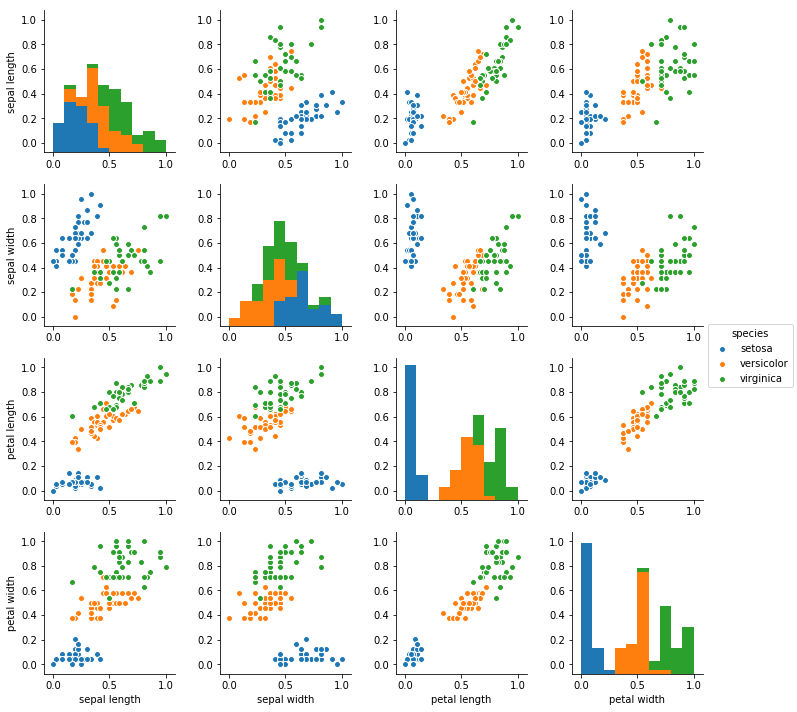

In [31]:
sns.pairplot(iris_p, hue="species");

In [32]:
X_train_p_normalized = preprocessing.Normalizer().transform(X_train_p)
iris_p_normalized = pd.DataFrame(X_train_p_normalized, columns=iris_measurements) \
                      .assign(species=[iris_dict["target_names"][idx] for idx in y_train])

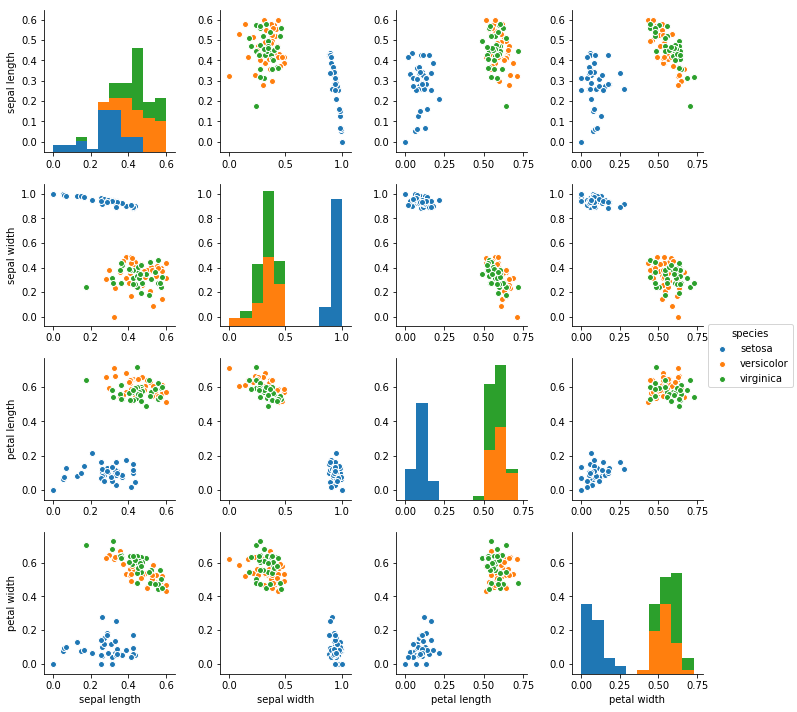

In [33]:
sns.pairplot(iris_p_normalized, hue="species");

## Pipeline

É um pouco burocrático ter de realizar o pré-processamento manualmente antes do classificador:

```python
from sklearn import preprocessing, módulo_com_classificador

pre_processor = preprocessing.ClasseDePréProcessamento(*args, **kwargs)
pre_processor.fit(X_train)

X_train_p = pre_processor.transform(X_train)
classifier = módulo_com_classificador.ClasseDoClassificador(*args, **kwargs)
classifier.fit(X_train_p, y_train)

X_test_p = pre_processor.transform(X_test)
y_pred = estimator.predict(X_test_p)
```

Na prática, queremos um objeto classificador que abstraia o processo inteiro de pré-processamento e de classificação, isto é, um classificador que já realiza o pré-processamento, para não ser necessário pré-processar cada entrada antes de usar o classificador. A realidade é que isso existe! O `sklearn.pipeline.Pipeline` conecta blocos de pré-processamento (objetos com `fit` e `transform`) a um único classificador recebendo uma lista de pares:

```python
from sklearn import pipeline
pipeline_classifier = pipeline.Pipeline([
    ("Nome da etapa 1 de pré-processamento", objeto_pre_processador1),
    ("Nome da etapa 2 de pré-processamento", objeto_pre_processador2),
    # ...
    ("Nome da etapa N de pré-processamento", objeto_pre_processadorN),
    ("Nome da etapa de classificação", objeto_classificador)
])
```

In [34]:
from sklearn import pipeline
pipeline.Pipeline([("normaliza", preprocessing.StandardScaler()),
                   ("classifica", svm.LinearSVC())]) \
        .fit(X_train, y_train) \
        .score(X_test, y_test)

0.78947368421052633

## Exercício: OCR de números!

O scikit-learn possui um dataset de dígitos escritos à mão:

In [35]:
digits_dict = datasets.load_digits()

Vamos visualizar os primeiros 10 dígitos:

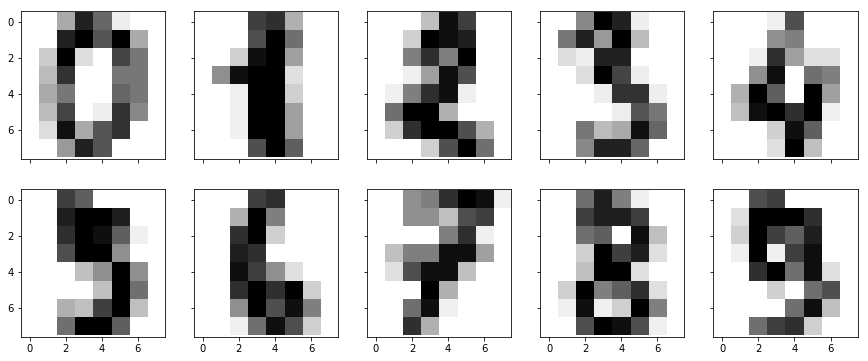

In [36]:
axes = plt.subplots(2, 5, figsize=(15, 6), sharex=True, sharey=True)[1]
for idx, ax in enumerate(axes.flat):
    ax.imshow(digits_dict["images"][idx], cmap=plt.cm.gray_r)

*Parte 1*: Bisbilhotar/fuçar/investigar esse dataset. Nesse passo é preciso, no mínimo, identificar o tamanho de cada imagem, o número total de imagens e a quantidade de cada dígito presente.

*Parte 2*: Utilizando algum dos classificadores disponíveis com o scikit-learn e as técnicas já vistas, criar um OCR para dígitos a partir desse dataset, reservando $30%$ do mesmo para a realização de uma avaliação exposta na forma de uma matriz de erro.

# Parte 3 - Aprendizado não-supervisionado

Até agora estudamos apenas o processo de classificação supervisionada, no qual tínhamos um rótulo categórico para cada vetor de *features*, e gostaríamos de predizê-lo quando novos dados surgissem. Se tivéssemos apenas os *features*, poderíamos inferir alguma informação a partir dos mesmos? Sim, e esses são os processos de aprendizado não-supervisionados.

## Clustering com o k-means

Provavelmente o algoritmo mais famoso de clustering é o k-means. Ele está implementado no scikit-learn na classe `sklearn.cluster.KMeans`. Como classificador, ele possui os métodos `fit` e `predict`, mas dessa vez o `fit` recebe apenas uma matriz de features para treinamento, e os labels são apenas números de $0$ a $k - 1$.

O k-means realiza um ciclo para a obtenção de "centróides":

1. Define $k$ pontos como centróides
2. Classifica cada ponto (linha da matriz de entrada) com o centróide mais próximo do mesmo (distância euclideana, tipicamente)
3. Atualiza os centróides com os novos centróides de cada conjunto classificado

A repetição dos passos $2$ e $3$ até a convergência é o que caracteriza o algoritmo.

![https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif](K-means_convergence.gif)

(Imagem obtida no Wikipedia)

Para exemplificar na prática, vamos aplicar o k-means aos blobs gerados anteriormente!

In [37]:
from sklearn import cluster

In [38]:
# O primeiro parâmetro é o número de clusters
kmeans_model = cluster.KMeans(4, random_state=42)
kmeans_model.fit(X_blob)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [39]:
y_blob_pred = kmeans_model.predict(X_blob)

Mesmo sem conhecer as classes de cada amostra, o algoritmo encontrou $4$ clusters a partir apenas dos pares de coordenadas de cada ponto. Vamos comparar visualmente o resultado desse processamento.

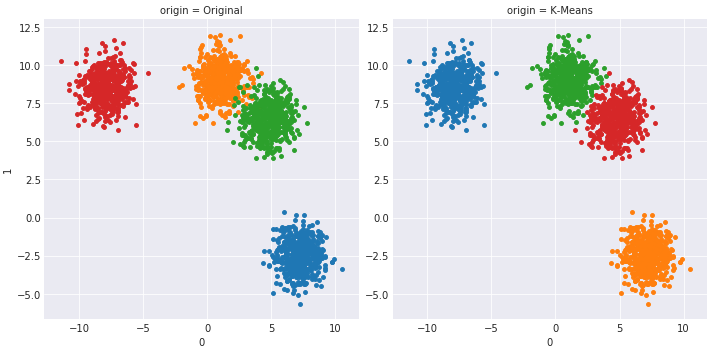

In [40]:
X_blob_dframe = pd.DataFrame(X_blob)
full_blob_dframe = pd.concat([
    X_blob_dframe.assign(y=y_blob, origin="Original"),
    X_blob_dframe.assign(y=y_blob_pred, origin="K-Means")
])
with sns.axes_style("darkgrid"):
    sns.FacetGrid(full_blob_dframe, hue="y", col="origin",
                  aspect=1, size=5, sharey=True) \
       .map(plt.scatter, 0, 1, s=15)

Parecem bastante próximos! As cores diferentes apenas representam que o índice arbitrário de cada cluster não são iguais. Podemos fingir que esse processamento foi supervisionado e calcular uma matriz de erro.

In [41]:
metrics.confusion_matrix(y_blob_pred, y_blob)

array([[  0,   0,   0, 500],
       [500,   0,   0,   0],
       [  0, 493,  11,   0],
       [  0,   7, 489,   0]])

Apenas $18$ dos $2000$ pontos usados para gerar os blobs não coincidiram. Mesmo sendo uma técnica de aprendizado não-supervisionado, pode-se dizer que ela foi eficaz em identificar as classes nesse caso artificial.

## Exercício

Aplicar o k-means ao Iris dataset e verificar o resultado através de uma matriz de erro. O k-means consegue classificar corretamente as $3$ espécies? E se usássemos outro valor para o $k$, como $2$, $4$ ou $6$, o que acontece?

## Separação de fontes de áudio com ICA - Independent Component Analysis

Dado um arquivo de áudio stereo, por exemplo:

https://freesound.org/people/vollkornbrot/sounds/380165/

Podemos separar os lados esquerdo e direito do áudio, convertendo em dois arquivos WAVE, `left.wav` e `right.wav`, usando o FFmpeg:

```shell
ffmpeg -i arquivo_baixado.mp3 -map_channel 0.0.0 left.wav -map_channel 0.0.1 right.wav
```

Os lados esquerdo e direito são muito similares nesse arquivo de áudio, mas seria possível separar as duas fontes sonoras (os $2$ cantores), ou pelo menos criar dois arquivos de áudio em que algum dos cantores está em maior evidência que o outro?

Vamos tentar encontrar componentes independentes no áudio usando o `sklearn.decomposition.FastICA`.

Para ler os arquivos de áudio como uma *array* do NumPy, vamos utilizar o SciPy:

In [42]:
from scipy.io import wavfile
rate, left = wavfile.read("left.wav")
right = wavfile.read("right.wav")[1]
rate # Amostras de áudio por segundo

FileNotFoundError: [Errno 2] No such file or directory: 'left.wav'

In [ ]:
audio_input = np.stack([left, right]).T
audio_input.shape # Par (amostras por canal, número de canais)

In [ ]:
audio_input.dtype

O FastICA no scikit-learn é um algoritmo de decomposição, o qual se comporta como uma rotina de pré-processamento.

In [ ]:
from sklearn import decomposition
ica = decomposition.FastICA(n_components=2)
ica

Assim como outros modelos de pré-processamento, há um `fit_transform`. A expressão:

```python
estimator.fit_transform(X)
```

é equivalente a:

```python
estimator.fit(X).transform(X)
```

In [ ]:
output = preprocessing.MaxAbsScaler().fit_transform(ica.fit_transform(audio_input))

In [ ]:
wavfile.write("result_0.wav", rate, output[:, 0])
wavfile.write("result_1.wav", rate, output[:, 1])

Para maiores detalhes sobre ICA no scikit-learn, vejam estes dois exemplos na documentação do scikit-learn:

* http://scikit-learn.org/stable/auto_examples/decomposition/plot_ica_blind_source_separation.html
* http://scikit-learn.org/stable/auto_examples/decomposition/plot_ica_vs_pca.html

O primeiro link contém, em particular, uma decomposição de sinais sintéticos, o qual ilustra bem o processo de decomposição realizado.

# Parte Final - O aprendizado não acaba aqui!

Há muitas coisas importantes que não puderam ser apresentadas neste tutorial introdutório, desde questionamentos gerais de ciência de dados:

* Como coletar os dados, e como esse processo pode influenciar os processos que seguem?
* Como identificar quais dados são relevantes para um estimador?
* Como tratar dados incompletos, espúrios e outliers?

Como questionamentos mais diretamente vinculados ao scikit-learn:

* Como selecinar o algoritmo de classificação?
* Como podemos fazer para encontrar o valor ideal do `k`?
* Como encontrar os melhores coeficientes do SVM?
* Como tratar *features* categóricos?

Parte desse conteúdo exige conhecimento não apenas do scikit-learn, mas com outras bibliotecas. Por exemplo, para tratar features categóricos pode-se usar o `sklearn.preprocessing.OneHotEncoder`, mas talvez o `pd.get_dummies` do Pandas seja mais adequado para o que se deseja fazer.

Minha sugestão para o autodidata que deseja continuar aprendendo sobre scikit-learn é que procure por material sobre:

* Regressão: Os modelos de regressão são similares aos vistos para a classificação, com a diferença de que o resultado não é mais categórico
* PCA: Decomposição fundamentada nas dimensões de maior variabilidade comumente utilizada para redução da dimensionalidade
* Grid Search: busca exaustiva por parâmetros para os estimadores

E veja os exemplos disponibilizados em http://scikit-learn.org/stable/auto_examples/index.html

# FIM! Espero que tenha gostado! =D